# Principal Component Analysis

Thuật toán PCA là một thuật toán học không giám sát (unsupervised learning)
Ở đây, chúng ta sẽ sử dụng thuật toán PCA trên dataset BreastCancer của sklearn

## PCA Review



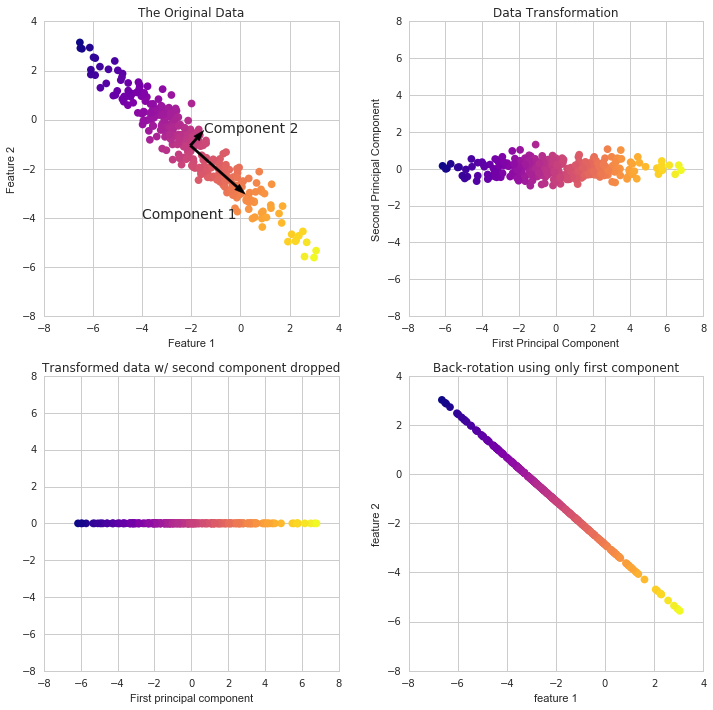

## Libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

## The Data

Import và xử lý dataset ung thư

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()

In [ ]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])
#(['DESCR', 'data', 'feature_names', 'target_names', 'target'])

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## PCA Visualization

Với những bài toán nhiều tham số như bài toàn trên, chúng ta sẽ gặp khó khăn với việc visualize dữ liệu đa chiều. Như vậy, ta có thể sử dụng PCA để tìm ra hai thành phần chính đầu tiên và visualize dữ liệu trong không gian hai chiều mới này với biểu đồ scatter. Trước khi thực hiện điều này, chúng ta cần phải scale dữ liệu để mỗi thuộc tính có giá trị phương sai.


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [ ]:
scaled_data = scaler.transform(df)

PCA với Scikit Learn sử dụng cách xử lý tương tự với các hàm tiền xử lý khác của SciKit Learn. Đầu tiên, ta khởi tạo một đối tượng PCA, tìm các thành phần chính bằng phương pháp fit, sau đó áp dụng phép xoay và giảm chiều dữ liệu (dimension reduction) bằng cách gọi transform().
Đồng thời ta có thể chỉ định số lượng thành phần mà chúng ta muốn giữ khi tạo đối tượng PCA.



In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
pca.fit(scaled_data)

PCA(n_components=2)

Chuyển dữ liệu thành 2 thành phần chính ( 2 chiều )

In [ ]:
x_pca = pca.transform(scaled_data)

In [ ]:
scaled_data.shape

(569, 30)

In [ ]:
x_pca.shape

(569, 2)

Đã thực hiện thành công giảm chiều dữ liệu từ 30 xuống 2 chiều.
Tiếp theo ta thực hiện biểu diễn trực quan bằng matplotlib

Text(0, 0.5, 'Second Principal Component')

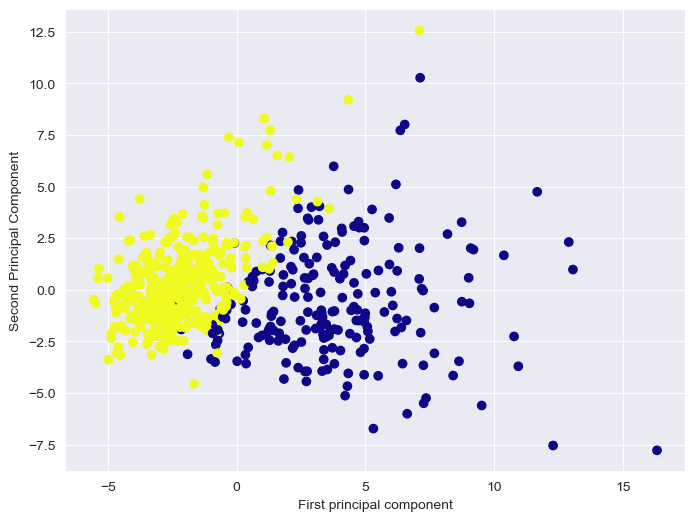

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Sau khi giảm chiều dữ liệu xuống 2 chiều, chúng ta có thể dễ dàng phân tách dữ liệu trên biểu đồ

## Giải thích các thành phần

Với việc giảm số chiều dữ liệu xuống 2 chiều, chúng ta sẽ phân tích những thành phần sau khi giảm chiều dữ liệu này này đại diện cho cái gì.

Các thành phần tương ứng với sự kết hợp của các thuộc tính gốc, chính các thành phần này được lưu trữ như một thuộc tính của đối tượng PCA đã được fit:

In [ ]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

Trong mảng ma trận  này, mỗi hàng đại diện cho một thành phần chính, và mỗi cột thể hiện sự tương quan với các thuộc tính gốc.

 Biểu diễn mối quan hệ này với một biểu đồ nhiệt:




In [ ]:
df_comp = pd.DataFrame(pca.components_,columns=cancer['feature_names'])

<AxesSubplot:>

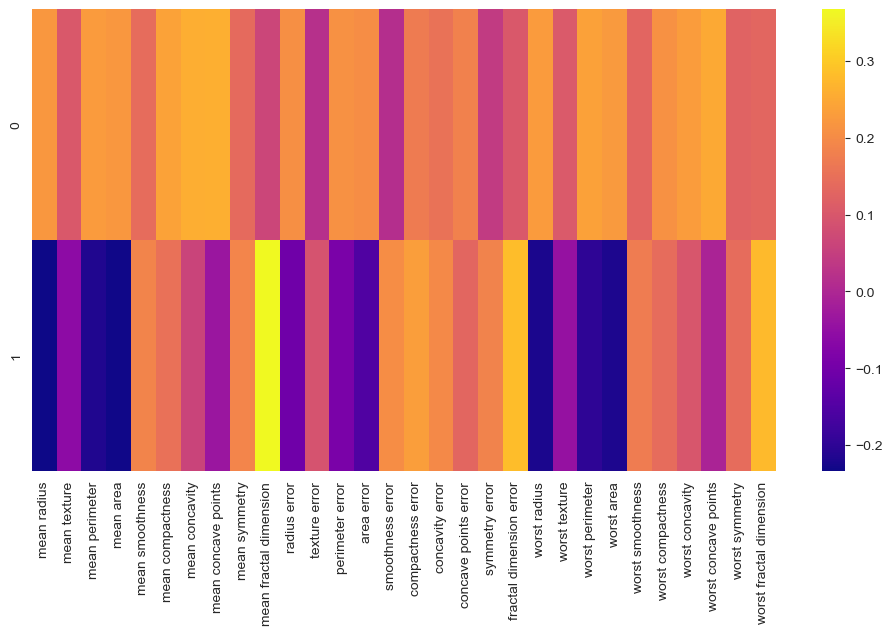

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

Biểu đồ nhiệt trên gồm các thanh màu thể hiện sự tương quan giữa các thuộc tính khác nhau với các thành phần chính đó